In [1]:
import numpy as np
import xcorr
import glob
import matplotlib.pyplot as plt
from xcorr import load_binary_data
from matplotlib.colors import SymLogNorm
from scipy.ndimage import gaussian_filter
from astropy import units as u
from astropy.cosmology import Planck15 as cosmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from matplotlib.legend_handler import HandlerLine2D
import pickle
import matplotlib as mpl

## Panel Plot

In [2]:
T_8 = load_binary_data('../../data/delta_T_v3_z008.06_nf0.553432_useTs1_256_200Mpc')
T_8 = np.reshape(T_8, (256, 256, 256))[:, :, 128]
T_7 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
T_7 = np.reshape(T_7, (256, 256, 256))[:, :, 128]
T_6 = load_binary_data('../../data/delta_T_v3_z006.00_nf0.025588_useTs1_256_200Mpc')
T_6 = np.reshape(T_6, (256, 256, 256))[:, :, 128]

In [3]:
I_8 = np.load('../../data/lyman_alpha_cube_8.06.npy')[:, :, 128]
I_7 = np.load('../../data/lyman_alpha_cube_7.04.npy')[:, :, 128]
I_6 = np.load('../../data/lyman_alpha_cube_6.0.npy')[:, :, 128]

In [4]:
I_8_d = np.load('../../data/diffuse_ir_cube_8_06.npy')[:, :, 128]
I_7_d = np.load('../../data/diffuse_ir_cube_7_04.npy')[:, :, 128]
I_6_d = np.load('../../data/diffuse_ir_cube_6_0.npy')[:, :, 128]

In [5]:
smooth = 1.

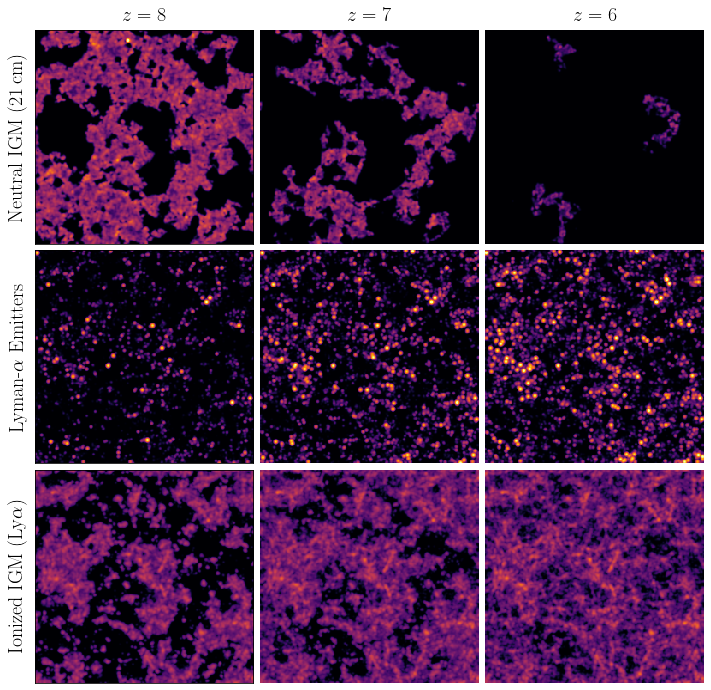

In [10]:
fig, ax = plt.subplots(3, 3, figsize = (12,12))

ax = ax.ravel()


# Row 1

ax[0].imshow(gaussian_filter(T_8, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
#ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[0].tick_params(axis=u'both', which=u'both',length=0)
ax[0].set_ylabel(r'Neutral IGM $\left(21\,\rm cm \right)$', fontsize = 20)
ax[0].set_title(r'$z = 8$', fontsize = 20, pad = 10)

ax[1].imshow(gaussian_filter(T_7, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
ax[1].axis('off')
ax[1].set_title(r'$z = 7$', fontsize = 20, pad = 10)

a = ax[2].imshow(gaussian_filter(T_6, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
ax[2].axis('off')
ax[2].set_title(r'$z = 6$', fontsize = 20, pad = 10)


# Row 2

ax[3].imshow(gaussian_filter(I_8, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(3e-9, vmax = 1e-6))
ax[3].xaxis.set_ticklabels([])
ax[3].yaxis.set_ticklabels([])
ax[3].tick_params(axis=u'both', which=u'both',length=0)
ax[3].set_ylabel(r'Lyman-$\alpha$ Emitters', fontsize = 20)

ax[4].imshow(gaussian_filter(I_7, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(3e-9, vmax = 1e-6))
ax[4].axis('off')

b = ax[5].imshow(gaussian_filter(I_6, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(3e-9, vmax = 1e-6))
ax[5].axis('off')

# Row 3

ax[6].imshow(gaussian_filter(I_8_d, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[6].xaxis.set_ticklabels([])
ax[6].yaxis.set_ticklabels([])
ax[6].tick_params(axis=u'both', which=u'both',length=0)
ax[6].set_ylabel(r'Ionized IGM $\left(\textrm{Ly}\alpha \right)$', fontsize = 20)

ax[7].imshow(gaussian_filter(I_7_d, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[7].axis('off')

c = ax[8].imshow(gaussian_filter(I_6_d, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[8].axis('off')


# Row 4
"""
ax[9].imshow(gaussian_filter(I_8, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[9].xaxis.set_ticklabels([])
ax[9].yaxis.set_ticklabels([])
ax[9].set_ylabel(r'Ionized IGM ', fontsize = 20)

ax[10].imshow(gaussian_filter(I_7, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[10].axis('off')

d = ax[11].imshow(gaussian_filter(I_6, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[11].axis('off')
"""



#divider = make_axes_locatable(ax[2])
#cax1 = divider.append_axes("right", size="5%", pad=0.07)

#divider = make_axes_locatable(ax[5])
#cax2 = divider.append_axes("right", size="5%", pad=0.07)

#divider = make_axes_locatable(ax[8])
#cax3 = divider.append_axes("right", size="5%", pad=0.07)

#divider = make_axes_locatable(ax[11])
#cax4 = divider.append_axes("right", size="5%", pad=0.07)


#fig.colorbar(a, cax=cax1)
#fig.colorbar(b, cax=cax2)
#fig.colorbar(c, cax=cax3)
#fig.colorbar(d, cax=cax4)

plt.subplots_adjust(wspace = 0.03, hspace = 0.03)
#plt.show()
plt.savefig('pub_plots/sims.pdf', dpi = 300, bbox_inches = 'tight', transparent=True)

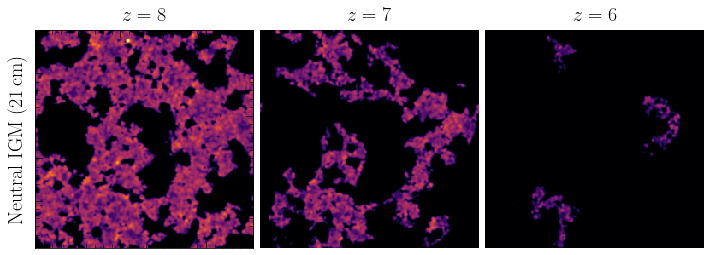

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))

ax = ax.ravel()

ax[0].imshow(gaussian_filter(T_8, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
#ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[0].set_ylabel(r'Neutral IGM $\left(21\,\rm cm \right)$', fontsize = 20)
ax[0].set_title(r'$z = 8$', fontsize = 20, pad = 10)

ax[1].imshow(gaussian_filter(T_7, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
ax[1].axis('off')
ax[1].set_title(r'$z = 7$', fontsize = 20, pad = 10)

a = ax[2].imshow(gaussian_filter(T_6, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
ax[2].axis('off')
ax[2].set_title(r'$z = 6$', fontsize = 20, pad = 10)


plt.subplots_adjust(wspace = 0.03, hspace = 0.03)
#plt.savefig('21cm_sim.png', dpi = 500, bbox_inches = 'tight', transparent=True)
plt.show()

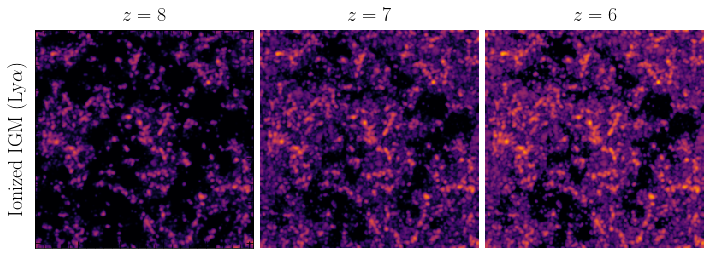

In [133]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))

ax = ax.ravel()


# Row 3

ax[0].imshow(gaussian_filter(I_8_d, smooth) * 1e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[0].set_title(r'$z = 8$', fontsize = 20, pad = 10)
ax[0].set_ylabel(r'Ionized IGM $\left(\textrm{Ly}\alpha \right)$', fontsize = 20)

ax[1].imshow(gaussian_filter(I_7_d, smooth) * 3e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[1].set_title(r'$z = 7$', fontsize = 20, pad = 10)
ax[1].axis('off')

c = ax[2].imshow(gaussian_filter(I_7_d, smooth) * 5e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[2].set_title(r'$z = 6$', fontsize = 20, pad = 10)
ax[2].axis('off')
plt.subplots_adjust(wspace = 0.03, hspace = 0.03)
plt.savefig('ionized_igm.png', dpi = 500, bbox_inches = 'tight', transparent=True)
#plt.savefig('../documents/images/sims.png', dpi = 100, bbox_inches = 'tight', transparent=True)

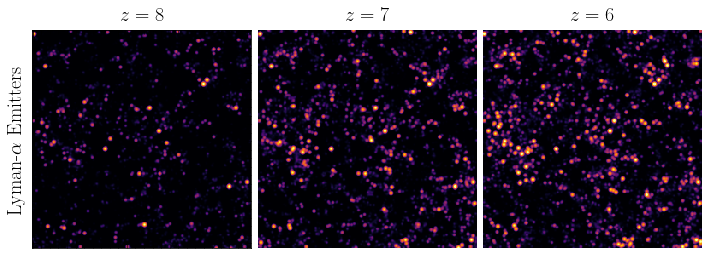

In [136]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))

ax = ax.ravel()


# Row 3

ax[0].imshow(gaussian_filter(I_8, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[0].set_title(r'$z = 8$', fontsize = 20, pad = 10)
ax[0].set_ylabel(r'Lyman-$\alpha$ Emitters', fontsize = 20)

ax[1].imshow(gaussian_filter(I_7, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[1].set_title(r'$z = 7$', fontsize = 20, pad = 10)
ax[1].axis('off')

ax[2].imshow(gaussian_filter(I_6, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[2].set_title(r'$z = 6$', fontsize = 20, pad = 10)
ax[2].axis('off')
plt.subplots_adjust(wspace = 0.03, hspace = 0.03)
#plt.show()
plt.savefig('laes.png', dpi = 500, bbox_inches = 'tight', transparent=True)

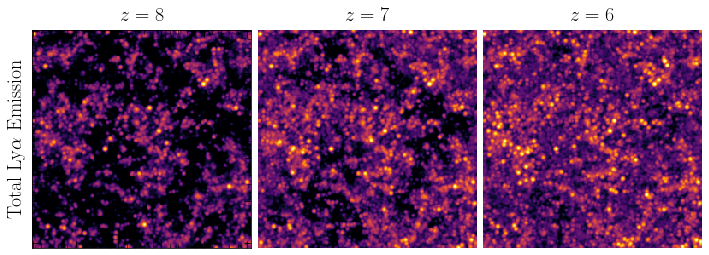

In [147]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))

ax = ax.ravel()


# Row 3

ax[0].imshow(gaussian_filter(I_8, smooth) + gaussian_filter(I_8_d, smooth) * 1e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[0].set_title(r'$z = 8$', fontsize = 20, pad = 10)
ax[0].set_ylabel(r'Total Ly$\alpha$ Emission', fontsize = 20)

ax[1].imshow(gaussian_filter(I_7, smooth) + gaussian_filter(I_7_d, smooth) * 3e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[1].set_title(r'$z = 7$', fontsize = 20, pad = 10)
ax[1].axis('off')

ax[2].imshow(gaussian_filter(I_6, smooth) + gaussian_filter(I_6_d, smooth) * 5e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-9, vmax = 1e-6))
ax[2].set_title(r'$z = 6$', fontsize = 20, pad = 10)
ax[2].axis('off')
plt.subplots_adjust(wspace = 0.03, hspace = 0.03)
plt.show()
#plt.savefig('both_comps.png', dpi = 500, bbox_inches = 'tight', transparent=True)

## Cross-Correlation Coefficient

In [319]:
heneka = np.genfromtxt('data/data.csv', delimiter=',')

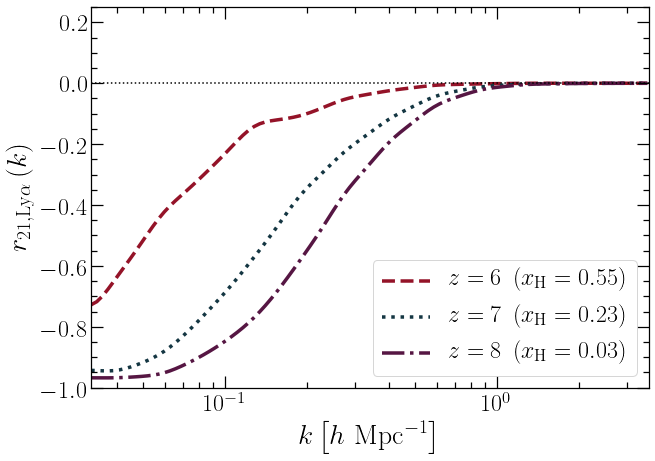

In [42]:
mpl.rcParams['axes.linewidth'] = 1.25

files = glob.glob('data/ccc_*npy')
files.sort()

k = np.load('data/ks.npy') * cosmo.h

k_spaced = np.logspace(np.log10(k.min() + 0.005),  np.log10(k.max() - 0.005), 100)

zs = [6, 7, 8]
x_H = [0.55, 0.23, 0.03]

colors = ['#941328', '#143642', '#561643']
ls = ['--', ':', '-.']

plt.figure(figsize=(10, 7))

for i in np.arange(len(files) - 1):
    r = np.load(files[i])
    ps = interp1d(k, r, kind = 'linear')
    plt.plot(k_spaced, gaussian_filter(ps(k_spaced), 2.), color = colors[i], linestyle = ls[i],
             label = r'$z = {0:} \ \left( x_{{\mathrm H}} = {1:} \right)$ '.format(zs[i], x_H[i]), linewidth = 3.5, zorder = 0)

#plt.scatter(heneka[:, 0] * cosmo.h * 0.99, heneka[:, 1], color = 'b', zorder = 2, 
#            label = r'Heneka 2017, $\left(z = 7 \right)$')
    
plt.xscale('log')
plt.xlim([3.2e-2, 3.6])
plt.ylim([-1, 0.25])
plt.tick_params(axis='both', which='major', labelsize=24, width = 1.25, length = 12)
plt.tick_params(axis='both', which='minor', width = 1.25, length = 6)
plt.tick_params(axis='x', pad = 7)
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 28)
plt.ylabel(r'$r_{21, \rm Ly \alpha}\,(k)$', fontsize = 28)
plt.axhline(0, color = 'k', linestyle = ':', zorder = 0)
plt.legend(fontsize = 24)
#plt.show()
plt.savefig('pub_plots/ccc_plot.pdf', dpi = 500, bbox_inches = 'tight')

## Ly$\alpha$ Power Spectrum

In [26]:
z = 6.0
halos = np.loadtxt('../../data/halos_z6.00_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)
ps_6, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

In [27]:
z = 7.04
halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)
ps_7, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

In [28]:
z = 8.06
halos = np.loadtxt('../../data/halos_z8.06_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)
ps_8, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

k *= cosmo.h

In [29]:
pullen = np.genfromtxt('/Users/tyler/Downloads/pullen.csv', delimiter=',')

In [30]:
idx = np.argsort(pullen[:, 0])
pullen[:, 0] = pullen[idx, 0]

In [31]:
pull_y = pullen[idx, 1]
pull_y = pull_y * u.nW ** 2 * u.m ** -4 * u.sr ** -2
pull_y = pull_y.to(u.erg ** 2 / u.s ** 2 / u.cm ** 4 / u.sr ** 2)

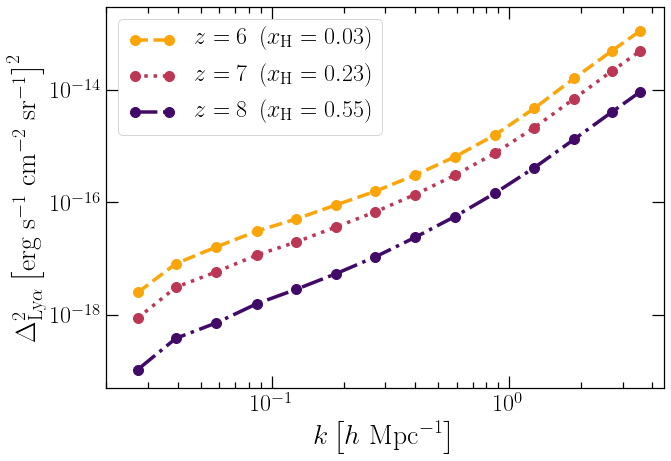

In [54]:
i_colors = plt.cm.inferno(np.linspace(0.2, 0.8, 3)[::-1])

plt.figure(figsize = (10, 7))

a, = plt.plot(k, ps_6, color = i_colors[0], alpha = 1., linestyle = ls[0], marker = 'o', linewidth = 3.5,
         label = r'$z = 6 \ \left( x_{\mathrm H} = 0.03 \right)$', markersize = 10)

b, = plt.plot(k, ps_7, color = i_colors[1], alpha = 1., linestyle = ls[1], marker = 'o', linewidth = 3.5,
         label = r'$z = 7 \ \left( x_{\mathrm H} = 0.23 \right)$', markersize = 10)

c, = plt.plot(k, ps_8, color = i_colors[2], alpha = 1., linestyle = ls[2], marker = 'o', linewidth = 3.5,
         label = r'$z = 8 \ \left( x_{\mathrm H} = 0.55 \right)$', markersize = 10)

#plt.plot(pullen[:, 0], gaussian_filter1d(pull_y * 1.5, 2.), 'k:', label = r'Pullen 2014, $\left(z = 7\right)$', 
#         alpha = 0.7, linewidth = 2)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 28)
plt.ylabel(r'$\Delta^2_{\rm Ly \alpha} \left[{\rm erg \ s^{-1} \ cm^{-2} \ sr^{-1}}\right]^2$', fontsize = 28)
plt.xlim([2e-2, 4.5])
plt.ylim([5e-20, 3e-13])
#plt.ylim([1e-24, 1e-8])
plt.tick_params(axis='both', which='major', labelsize=24, width = 1.25, length = 12)
plt.tick_params(axis='both', which='minor', width = 1.25, length = 6)
plt.tick_params(axis='x', pad = 7)
plt.legend(handler_map={a: HandlerLine2D(numpoints=2), 
                        b: HandlerLine2D(numpoints=2), 
                        c: HandlerLine2D(numpoints=2)}, fontsize = 24)
#plt.show()
plt.savefig('pub_plots/lyman_alpha_pspec.pdf', dpi = 500, bbox_inches = 'tight')

## 21cm Power Spectrum

In [21]:
dT_6 = load_binary_data('../../data/delta_T_v3_z006.00_nf0.025588_useTs1_256_200Mpc')
dT_6 = np.reshape(dT_6, (256, 256, 256))
ps_21_6, k = xcorr.dimensional_ps(dT_6, 200, bins = 14, log_bins = True)

dT_7 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
dT_7 = np.reshape(dT_7, (256, 256, 256))
ps_21_7, k = xcorr.dimensional_ps(dT_7, 200, bins = 14, log_bins = True)

dT_8 = load_binary_data('../../data/delta_T_v3_z008.06_nf0.553432_useTs1_256_200Mpc')
dT_8 = np.reshape(dT_8, (256, 256, 256))
ps_21_8, k = xcorr.dimensional_ps(dT_8, 200, bins = 14, log_bins = True)

k *= cosmo.h

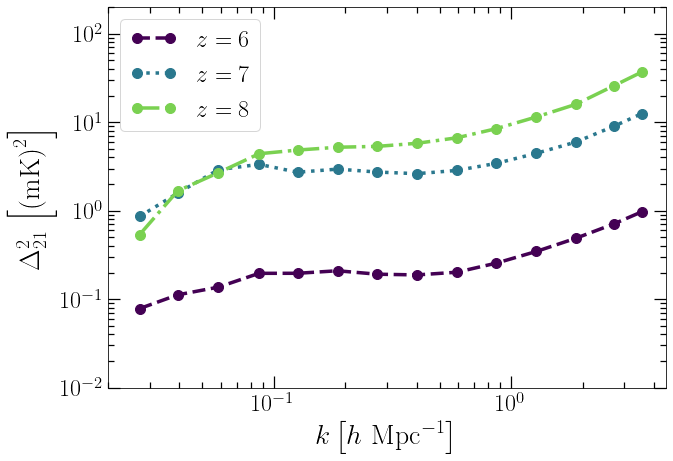

In [38]:
r_colors = plt.cm.viridis(np.linspace(0., 0.8, 3))

ls = ['--', ':', '-.']

plt.figure(figsize = (10, 7))
#plt.scatter(k, ps_21_6, label = r'$z = 6$', color = r_colors[0])
a, = plt.plot(k, ps_21_6 * cosmo.h ** 3, linestyle = ls[0], color = r_colors[0], marker = 'o', markersize = 10,
              label = r'$z = 6$', linewidth = 3.5)
#plt.scatter(k, ps_21_7, label = r'$z = 7$', color = r_colors[1])
b, = plt.plot(k, ps_21_7 * cosmo.h ** 3, linestyle = ls[1], color = r_colors[1], marker = 'o', markersize = 10,
              label = r'$z = 7$', linewidth = 3.5)
#plt.scatter(k, ps_21_8, label = r'$z = 8$', color = r_colors[2])
c, = plt.plot(k, ps_21_8 * cosmo.h ** 3, linestyle = ls[2], color = r_colors[2], marker = 'o', markersize = 10,
              label = r'$z = 8$', linewidth = 3.5)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 28)
plt.ylabel(r'$\Delta^2_{21}$ $\left[\left({\rm mK}\right)^{2}\right]$', fontsize = 28)
plt.legend(handler_map={a: HandlerLine2D(numpoints=2), 
                        b: HandlerLine2D(numpoints=2), 
                        c: HandlerLine2D(numpoints=2)}, fontsize = 24)

plt.tick_params(axis='both', which='major', labelsize=24, width = 1.25, length = 12)
plt.tick_params(axis='both', which='minor', width = 1.25, length = 6)
plt.tick_params(axis='x', pad = 7)
plt.xlim([2e-2, 4.5])
plt.ylim([1e-2, 2e2])
#plt.show()
plt.savefig('pub_plots/21cm_power_spectrum.pdf', dpi = 500, bbox_inches = 'tight')

## 21cm-Ly$\alpha$ Power Spectrum

In [65]:
halos = np.loadtxt('../../data/halos_z8.06_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_8 = xcorr.cube_brightness(halo_mass, halo_pos, z = 8.04)

ps_x_8, k = xcorr.power_spectra(dT_8 * xcorr.mK_to_SB(1. * u.mK, z = 8.04).value, 200, 
                                 deltax2 = I_8,  bins = 14, log_bins = True)
del I_8

halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_7 = xcorr.cube_brightness(halo_mass, halo_pos, z = 7.04)

ps_x_7, k = xcorr.power_spectra(dT_7 * xcorr.mK_to_SB(1. * u.mK, z = 7.04).value, 200, 
                                 deltax2 = I_7,  bins = 14, log_bins = True)
del I_7

halos = np.loadtxt('../../data/halos_z6.00_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_6 = xcorr.cube_brightness(halo_mass, halo_pos, z = 6.)

ps_x_6, k = xcorr.power_spectra(dT_6 * xcorr.mK_to_SB(1. * u.mK, z = 6.).value, 200, 
                                deltax2 = I_6, bins = 14, log_bins = True)
del I_6

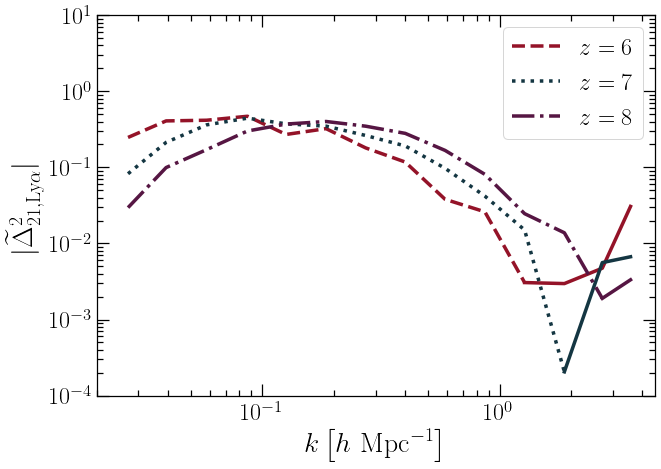

In [70]:
plt.figure(figsize = (10,7))
plt.plot(k[:11] * cosmo.h, np.abs(ps_x_6[:11]), linestyle = ls[0], color = colors[0],
         label = r'$z = 6$', linewidth = 3.5)

plt.plot(k[10:] * cosmo.h, np.abs(ps_x_6[10:]), color = colors[0], linewidth = 3.5)

plt.plot(k[:12] * cosmo.h, np.abs(ps_x_7[:12]), linestyle = ls[1], color = colors[1],
         label = r'$z = 7$', linewidth = 3.5)
plt.plot(k[11:] * cosmo.h, np.abs(ps_x_7[11:]), color = colors[1], linewidth = 3.5)

plt.plot(k[:13] * cosmo.h, np.abs(ps_x_8[:13]), linestyle = ls[2], color = colors[2],
         label = r'$z = 8$', linewidth = 3.5)
plt.plot(k[12:] * cosmo.h, np.abs(ps_x_8[12:]), color = colors[2], linewidth = 3.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ \mathrm{Mpc}^{-1} \right]$', fontsize = 28)
plt.ylabel(r' $|\widetilde{\Delta}^2_{21, \mathrm{Ly}\alpha} |$', fontsize = 28)
plt.legend(fontsize = 24)
plt.xlim([2e-2, 4.5])
plt.ylim([1e-4, 1e1])
plt.tick_params(axis='both', which='major', labelsize=24, width = 1.25, length = 12)
plt.tick_params(axis='both', which='minor', width = 1.25, length = 6)
plt.tick_params(axis='x', pad = 7)
#plt.show()
plt.savefig('pub_plots/cross_power_spec.pdf', dpi = 500, bbox_inches = 'tight')

## Noise Power Spectra

Apparently, I'm terrible at organizing code. Check `Noise_Power_Spectra.ipynb` for noise estimates. Will migrate eventually if anyone actually ever cares about this work

In [156]:
opt_files = glob.glob('z*opt.npz')
opt_files.sort()

mod_files = glob.glob('z*mod.npz')
mod_files.sort()

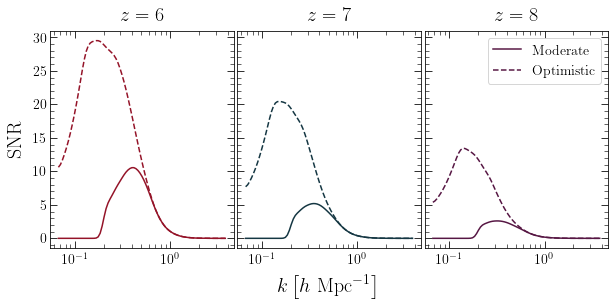

In [160]:
fig, axs = plt.subplots(1, 3, figsize = (10, 4), sharey = True)
axs = axs.ravel()

s = [0.55, 0.75, 1.][::-1]

for i in range(len(mod_files)):
    mod = np.load(mod_files[i])
    opt = np.load(opt_files[i])
    axs[i].plot(mod['ks'], gaussian_filter1d(np.abs(mod['xps']) / mod['noise'], 1.5) * s[i], 
                color = colors[i], label = 'Moderate')
    axs[i].plot(opt['ks'], gaussian_filter1d(np.abs(opt['xps']) / opt['noise'], 1.5) * s[i], 
                color = colors[i], linestyle = '--', label = 'Optimistic')
    axs[i].set_xscale('log')
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[i].tick_params(axis='x', pad = 6)
    
    if i == 0:
        axs[i].set_ylabel('SNR', fontsize = 20, labelpad = 8)
        
    if i == 1:
        axs[i].set_xlabel(r'$k \left[h \ \mathrm{Mpc}^{-1} \right]$', fontsize = 20, labelpad = 8)
        
    if i == 2:
        axs[i].legend(fontsize = 14)
        
    axs[i].set_title(r'$z = {}$'.format(6 + i), fontsize = 20, pad = 10)
    
plt.subplots_adjust(wspace = 0.02)
plt.savefig('../documents/images/xcorr_snr.png', dpi = 500, bbox_inches = 'tight', transparent = True)
#plt.show()

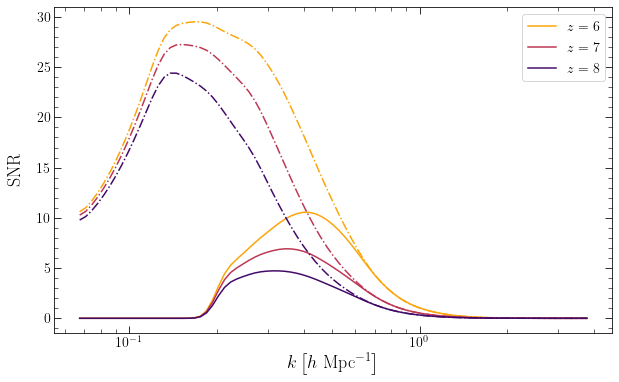

In [77]:
z = [6,7,8]
plt.figure(figsize=(10,6))

for i in range(len(mod_files)):
    mod = np.load(mod_files[i])
    opt = np.load(opt_files[i])
    #plt.plot(mod['ks'], np.abs(mod['xps']) / mod['noise'], 
    #         color = colors[i], label = r'$z = $ {}'.format(z[i]))
    #plt.plot(opt['ks'], np.abs(opt['xps']) / opt['noise'], color = colors[i], 
    #         linestyle = '-.')
    plt.plot(mod['ks'], gaussian_filter1d(np.abs(mod['xps']) / mod['noise'], 1.5), 
             color = colors[i], label = r'$z = $ {}'.format(z[i]))
    plt.plot(opt['ks'], gaussian_filter1d(np.abs(opt['xps']) / opt['noise'], 1.5), color = colors[i], 
             linestyle = '-.')

plt.xscale('log')
plt.legend(fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'$k \left[h \ \mathrm{Mpc}^{-1} \right]$', fontsize = 18)
plt.ylabel(r'SNR', fontsize = 18, labelpad = 14)
plt.savefig('cross_power_SNR.png', dpi = 500, bbox_inches = 'tight')
#plt.show()

## Overlapping $k$-space range 

In [27]:
import matplotlib.patches as patches
from astropy import constants as const

In [96]:
def k_perp(b, z = 6):
    nu = 1420. * u.MHz / (z + 1)
    return (2 * np.pi * nu * b / (const.c * cosmo.comoving_distance(z))).to(u.Mpc ** -1).value
    
def k_par(z):
    nu = 1420. * u.MHz / (1 + z)
    eta = 1.
    return (cosmo.H0 * 2 * np.pi * cosmo.efunc(z)) / (const.c * (1. + z) ** 2) * eta

def curves(k_perp, v):
    a = np.sqrt(v ** 2 - k_perp ** 2)
    a[np.isnan(a)] = 1e-5
    return a

In [403]:
kperp = np.linspace(0, 10, 500)

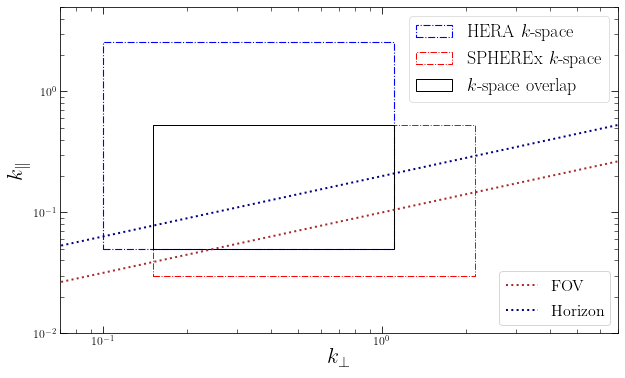

In [453]:
fig,ax = plt.subplots(1, figsize = (10, 6))
#plt.plot(kperp, curves(kperp, 0.2), 'k', alpha = 0.35, zorder = 0)
#plt.plot(kperp, curves(kperp, 0.3), 'k', alpha = 0.35, zorder = 0)
#plt.plot(kperp, curves(kperp, 0.5), 'k', alpha = 0.35, zorder = 0)
#plt.plot(kperp, curves(kperp, .8), 'k', alpha = 0.35, zorder = 0)
#plt.plot(kperp, curves(kperp, 1.5), 'k', alpha = 0.35, zorder = 0)

hera = patches.Rectangle((0.1, 0.05), 1., 2.5, linewidth=1.1, edgecolor='b', 
                         facecolor='none', linestyle = '-.', label = 'HERA $k$-space')
spherex = patches.Rectangle((0.15, 0.03), 2, 0.5, linewidth=1, edgecolor='r', 
                            facecolor='none', linestyle = '-.', label = 'SPHEREx $k$-space')
rect = patches.Rectangle((0.15,0.05), .95, 0.475, linewidth=1, edgecolor='k', 
                         facecolor='none', linestyle = '-', label = '$k$-space overlap')




ax.add_patch(hera)
ax.add_patch(spherex)
ax.add_patch(rect)

a,  = plt.plot(kperp, (kperp / 100.) ** 0.5, 'brown', linewidth = 2., linestyle = ':')
b,  = plt.plot(kperp, (kperp / 25.) ** 0.5, 'navy', linewidth = 2., linestyle = ':')

ax.set_xlim([0.07, 7])
ax.set_ylim([0.01, 5])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k_{\perp}$', fontsize = 22)
ax.set_ylabel(r'$k_{\parallel}$', fontsize = 22)
leg1 = ax.legend(fontsize = 18, loc = 'upper right', framealpha=0.6)
leg2 = ax.legend([a, b], ['FOV', 'Horizon'], loc = 'lower right', fontsize = 16)
ax.add_artist(leg1)
#plt.show()
plt.savefig('kspace_res_wedge.png', dpi = 500, bbox_inches = 'tight')

In [69]:
with open('hera_sense_mod_6.pkl', 'rb') as pfile:
    sensitivity = pickle.load(pfile)

In [256]:
uv_plane = sensitivity.uv_coverage + np.rot90(sensitivity.uv_coverage, 2)

In [259]:
from scipy.interpolate import interp2d

In [258]:
uv_plane.shape

(41, 41)

In [454]:
observation = sensitivity.observation

In [471]:
observation.observatory.latitude.to(u.degree)

<Quantity 30.72136672 deg>

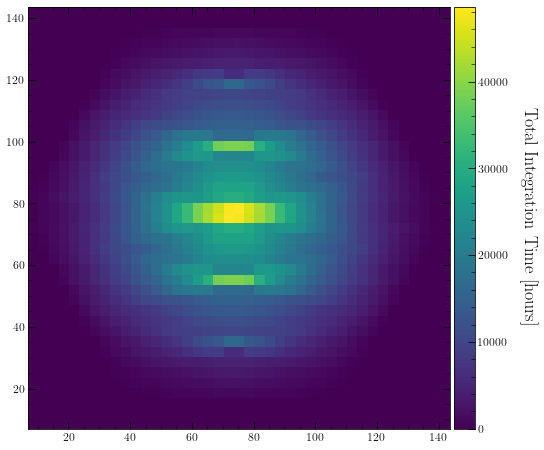

In [469]:
plt.figure(figsize=(8,8))
ax = plt.gca()
plt.imshow(observation.total_integration_time.to("hour").value, 
           extent=(observation.ugrid.min(), observation.ugrid.max())*2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(cax = cax)
cbar.set_label("Total Integration Time [hours]", rotation = 270, labelpad = 30, fontsize = 18)
plt.savefig('rotation_syn.png', dpi = 500, bbox_inches = 'tight', transparent = True)

## Test Pixel Masking

## Grid Interpolation for Cool Sims

In [161]:
from scipy.interpolate import RegularGridInterpolator

In [242]:
fs = glob.glob('../../data/delta_T_v3_z*')
fs.sort()
fs = fs[:-2]

In [243]:
cube = np.zeros((256, 256, len(fs)))

In [244]:
for i in range(len(fs)):
    c = load_binary_data(fs[i])
    c = np.reshape(c, (256,256,256))
    cube[:, :, i] = c[:, :, 0]

In [245]:
cube_interp = RegularGridInterpolator((np.linspace(0, 1, 256), np.linspace(0, 1, 256), np.linspace(0, 1, len(fs))), cube,
                                     method = 'linear')

In [246]:
x = np.linspace(0, 1, 256)

In [250]:
a,b,c = np.meshgrid(x, x, np.linspace(0, 1, 240))

In [251]:
int_cube = cube_interp((a,b,c))

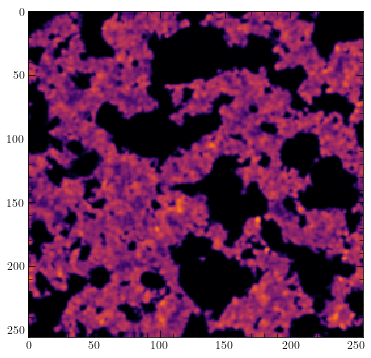

In [252]:
plt.figure(figsize=(6,6))

for i in range(int_cube.shape[2]):
    plt.clf()
    plt.imshow(gaussian_filter(int_cube[:, :, i], smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(10, vmax = 200))
    plt.savefig('cube_sim/{}.png'.format(i), dpi = 100, bbox_inches = 'tight')

## Ly$\alpha$ Power Spectrum w/ Diffuse Emission

In [8]:
I_8 = np.load('../../data/lyman_alpha_cube_8.06.npy') * 2.
I_8_d = np.load('../../data/diffuse_ir_cube_8_06.npy') * 2.
ps_8, k = xcorr.dimensional_ps(I_8 + I_8_d, 200, bins = 14, log_bins = True)

I_7 = np.load('../../data/lyman_alpha_cube_7.04.npy') * 2.
I_7_d = np.load('../../data/diffuse_ir_cube_7_04.npy') * 2.
ps_7, k = xcorr.dimensional_ps(I_7 + I_7_d, 200, bins = 14, log_bins = True)

I_6 = np.load('../../data/lyman_alpha_cube_6.0.npy') * 2.
I_6_d = np.load('../../data/diffuse_ir_cube_6_0.npy') * 2.
ps_6, k = xcorr.dimensional_ps(I_6 + I_6_d, 200, bins = 14, log_bins = True)

k *= cosmo.h

In [9]:
xps = np.genfromtxt('/Users/tyler/Downloads/heneka_cps.csv', delimiter=',')

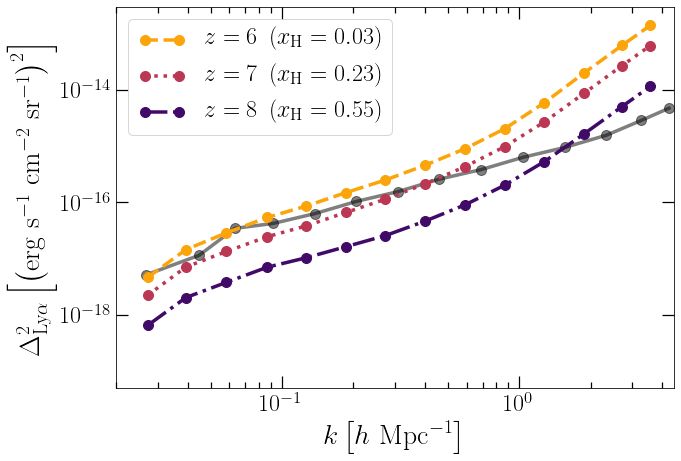

In [15]:
i_colors = plt.cm.inferno(np.linspace(0.2, 0.8, 3)[::-1])

ls = ['--', ':', '-.']

plt.figure(figsize = (10, 7))

a, = plt.plot(k, ps_6 * cosmo.h ** 3, color = i_colors[0], alpha = 1., linestyle = ls[0], marker = 'o', linewidth = 3.5,
         label = r'$z = 6 \ \left( x_{\mathrm H} = 0.03 \right)$', markersize = 10)

b, = plt.plot(k, ps_7 * cosmo.h ** 3, color = i_colors[1], alpha = 1., linestyle = ls[1], marker = 'o', linewidth = 3.5,
         label = r'$z = 7 \ \left( x_{\mathrm H} = 0.23 \right)$', markersize = 10)

c, = plt.plot(k, ps_8 * cosmo.h ** 3, color = i_colors[2], alpha = 1., linestyle = ls[2], marker = 'o', linewidth = 3.5,
         label = r'$z = 8 \ \left( x_{\mathrm H} = 0.55 \right)$', markersize = 10)

#plt.plot(pullen[:, 0], gaussian_filter1d(pull_y * 1.5, 2.), 'k:', label = r'Pullen 2014, $\left(z = 7\right)$', 
#         alpha = 0.7, linewidth = 2)

plt.plot(xps[:, 0] * cosmo.h, xps[:, 1], color = 'black', marker = 'o', 
         linewidth = 3.5, markersize = 10, alpha = 0.5, zorder = 0)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 28)
plt.ylabel(r'$\Delta^2_{\rm Ly \alpha} \left[\left({\rm erg \ s^{-1} \ cm^{-2} \ sr^{-1}}\right)^2\right]$', fontsize = 28)
plt.xlim([2e-2, 4.5])
plt.ylim([5e-20, 3e-13])
#plt.ylim([1e-24, 1e-8])
plt.tick_params(axis='both', which='major', labelsize=24, width = 1.25, length = 12)
plt.tick_params(axis='both', which='minor', width = 1.25, length = 6)
plt.tick_params(axis='x', pad = 7)
plt.legend(handler_map={a: HandlerLine2D(numpoints=2), 
                        b: HandlerLine2D(numpoints=2), 
                        c: HandlerLine2D(numpoints=2)}, fontsize = 24)
plt.show()
#plt.savefig('pub_plots/lyman_alpha_pspec.pdf', dpi = 500, bbox_inches = 'tight')